In [2]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



In [3]:
occu <- read.csv("occupancy_outliers_removed.csv")

In [4]:
head(occu)

,Day,Date,Headcount,Time,DaysSinceStart,TableRentals,VideoRentals,BoardRentals,TotalRentals,TableDur,VideoDur,BoardDur,TotalDur,MinutesSinceOpen
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Wednesday,8/30/2023,3,12:10,7,45,9,0,54,1306,360,0,1666,145
2,Wednesday,8/30/2023,6,12:25,7,45,9,0,54,1306,360,0,1666,160
3,Wednesday,8/30/2023,4,12:34,7,45,9,0,54,1306,360,0,1666,169
4,Wednesday,8/30/2023,0,12:45,7,45,9,0,54,1306,360,0,1666,180
5,Wednesday,8/30/2023,2,12:47,7,45,9,0,54,1306,360,0,1666,182
6,Wednesday,8/30/2023,8,13:27,7,45,9,0,54,1306,360,0,1666,222


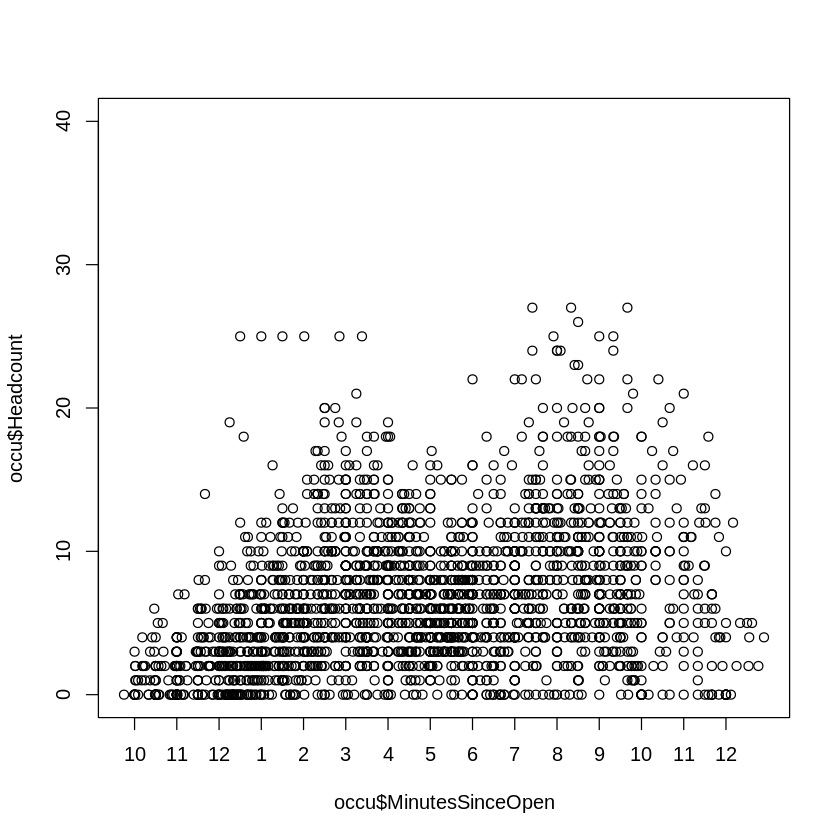

In [5]:
#making a plot with hour axis
plot(occu$MinutesSinceOpen, occu$Headcount, ylim=c(0,40), xaxt='n')
axis(1, at=c(15,75,135,195,255,315,375,435,495,555,615,675,735,795,855), labels=c(10,11,12,1,2,3,4,5,6,7,8,9,10,11,12))

In [6]:
#trying out some dinky models
basic_model <- lm(Headcount ~ I(DaysSinceStart^2), data=occu)
summary(lm(Headcount ~ DaysSinceStart + MinutesSinceOpen, data=occu))


Call:
lm(formula = Headcount ~ DaysSinceStart + MinutesSinceOpen, data = occu)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2004  -3.3253  -0.6618   2.6014  20.6553 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.2190879  0.2870380   14.70  < 2e-16 ***
DaysSinceStart   -0.0103834  0.0030537   -3.40 0.000685 ***
MinutesSinceOpen  0.0071171  0.0004766   14.93  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.646 on 2271 degrees of freedom
Multiple R-squared:  0.09409,	Adjusted R-squared:  0.09329 
F-statistic: 117.9 on 2 and 2271 DF,  p-value: < 2.2e-16


In [7]:
all_model <- lm(Headcount ~ (Day + DaysSinceStart + MinutesSinceOpen + TotalRentals + TotalDur)^2
                + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + I(TotalRentals^2) + I(TotalDur^2),
                data = occu)

In [8]:
summary(all_model)


Call:
lm(formula = Headcount ~ (Day + DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur)^2 + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2), data = occu)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4211  -2.8405  -0.3073   2.3199  18.5398 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -1.920e+00  2.781e+00  -0.691  0.48991    
DayMonday                       -1.949e+00  2.089e+00  -0.933  0.35101    
DaySaturday                     -2.956e+00  2.088e+00  -1.416  0.15703    
DaySunday                       -5.024e+00  2.237e+00  -2.246  0.02483 *  
DayThursday                      1.627e+00  2.245e+00   0.725  0.46871    
DayTuesday                      -1.424e+00  2.069e+00  -0.688  0.49155    
DayWednesday                     1.696e+00  2.323e+00   0.730  0.46535    
DaysSinceStart                  -1.685e-02  4.007e-02  -0.420  0.67421   

In [9]:
step(all_model, direction = "backward")

Start:  AIC=6531.71
Headcount ~ (Day + DaysSinceStart + MinutesSinceOpen + TotalRentals + 
    TotalDur)^2 + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2)

                                  Df Sum of Sq   RSS    AIC
- Day:MinutesSinceOpen             6      73.8 38714 6524.0
- Day:TotalDur                     6     152.1 38793 6528.6
- DaysSinceStart:MinutesSinceOpen  1       2.2 38643 6529.8
- I(TotalDur^2)                    1       3.2 38644 6529.9
- MinutesSinceOpen:TotalDur        1       3.8 38645 6529.9
<none>                                         38641 6531.7
- I(DaysSinceStart^2)              1      52.4 38693 6532.8
- TotalRentals:TotalDur            1      53.9 38695 6532.9
- DaysSinceStart:TotalDur          1      73.6 38714 6534.0
- DaysSinceStart:TotalRentals      1     117.0 38758 6536.6
- Day:TotalRentals                 6     292.5 38933 6536.9
- Day:DaysSinceStart               6     317.2 38958 6538.3
- MinutesSinceOpen:TotalR


Call:
lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2) + Day:DaysSinceStart + 
    Day:TotalRentals + DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur + 
    MinutesSinceOpen:TotalRentals + TotalRentals:TotalDur, data = occu)

Coefficients:
                  (Intercept)                      DayMonday  
                   -1.323e+00                     -1.787e+00  
                  DaySaturday                      DaySunday  
                   -1.648e+00                     -3.212e+00  
                  DayThursday                     DayTuesday  
                    2.033e+00                     -1.850e+00  
                 DayWednesday                 DaysSinceStart  
                    2.825e+00                     -5.443e-02  
             MinutesSinceOpen                   TotalRentals  
                    2.432e-02                      2

In [17]:
new_model <- lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen +
    TotalRentals + TotalDur + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) +
    I(TotalRentals^2) + I(TotalDur^2) + Day:DaysSinceStart +
    Day:TotalRentals + DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur +
    MinutesSinceOpen:TotalRentals + TotalRentals:TotalDur, data = occu)

wts <- 1/ fitted(new_model)^2
model_weighted <- lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen +
    TotalRentals + TotalDur + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) +
    I(TotalRentals^2) + I(TotalDur^2) + Day:DaysSinceStart +
    Day:TotalRentals + DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur +
    MinutesSinceOpen:TotalRentals + TotalRentals:TotalDur, data = occu, weights = wts)

summary(model_weighted)


Call:
lm(formula = Headcount ~ Day + DaysSinceStart + MinutesSinceOpen + 
    TotalRentals + TotalDur + I(DaysSinceStart^2) + I(MinutesSinceOpen^2) + 
    I(TotalRentals^2) + I(TotalDur^2) + Day:DaysSinceStart + 
    Day:TotalRentals + DaysSinceStart:TotalRentals + DaysSinceStart:TotalDur + 
    MinutesSinceOpen:TotalRentals + TotalRentals:TotalDur, data = occu, 
    weights = wts)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-21.2224  -0.4796  -0.0087   0.4689  14.6453 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.375e+00  1.515e+00  -0.908 0.364159    
DayMonday                     -5.257e+00  1.803e+00  -2.917 0.003574 ** 
DaySaturday                   -9.158e+00  1.732e+00  -5.287 1.37e-07 ***
DaySunday                     -3.073e+00  1.343e+00  -2.288 0.022202 *  
DayThursday                    1.438e+00  2.033e+00   0.707 0.479495    
DayTuesday                    -5.882e+00  1.397e

In [18]:
res <- resid(model_weighted)

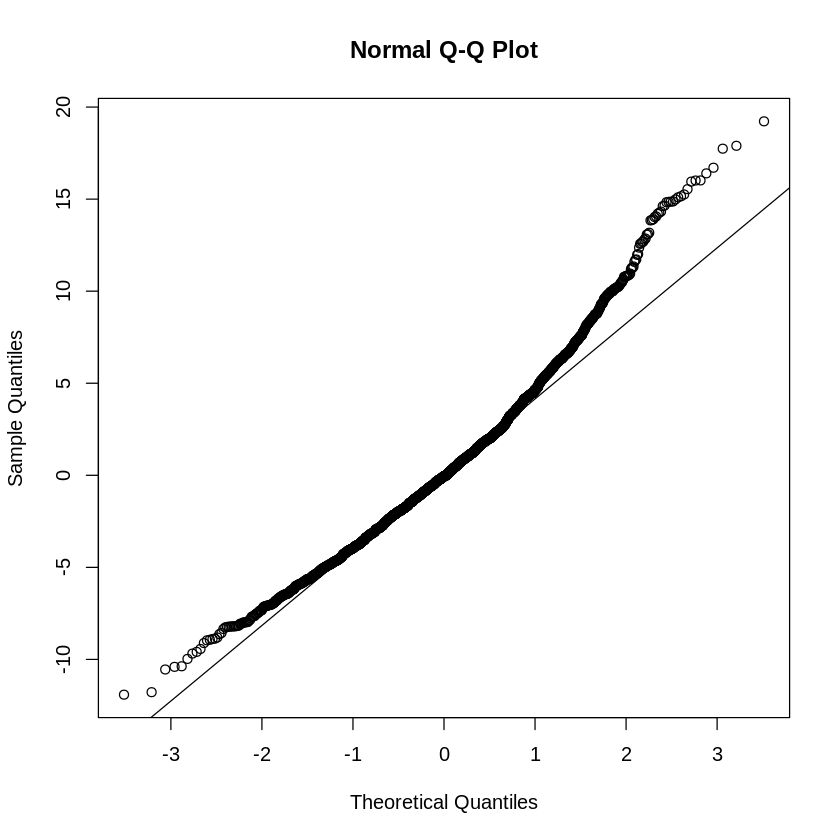

In [19]:
qqnorm(res)
qqline(res)

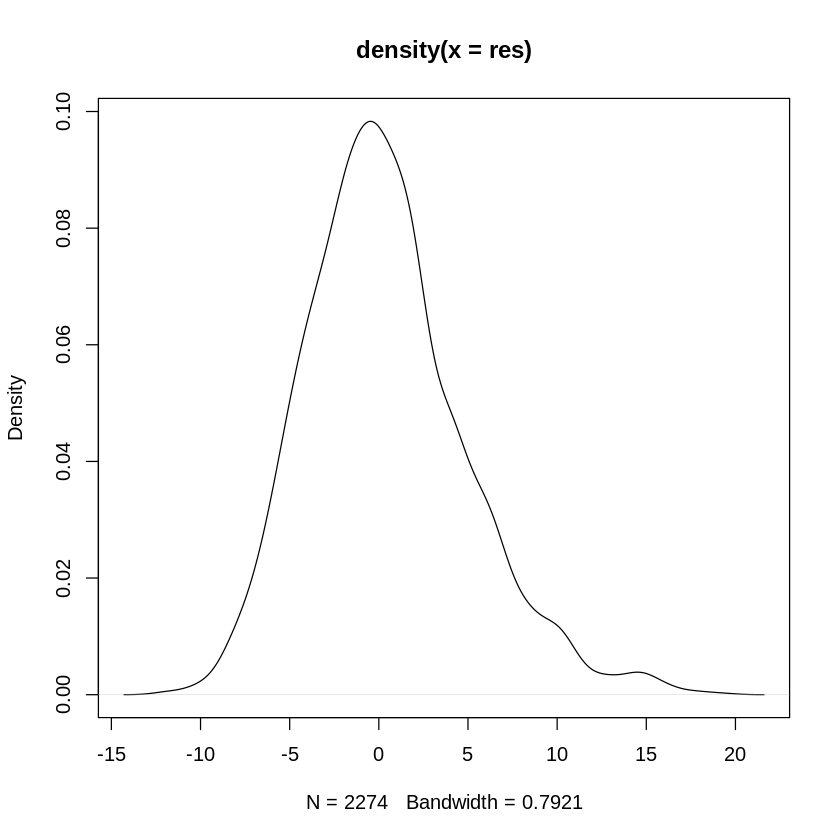

In [20]:
plot(density(res))